# Data Description

## Overview

#### The data has been split into two groups:  
+ training set (train.csv)
+ test set (test.csv)

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.
The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

#### Data Dictionary

| Variable | Definition	Key|
|-|-|
| survival	|Survival	0 = No, 1 = Yes
| pclass	|Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
| sex	|Sex	
| Age|Age in years	
| sibsp|	# of siblings / spouses aboard the Titanic	
| parch	|# of parents / children aboard the Titanic	
| ticket|Ticket number	
| fare|	Passenger fare	
| cabin|	Cabin number	
| embarked	|Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

#### Variable Notes
 
+ pclass: A proxy for socio-economic status (SES)
+ 1st = Upper
+ 2nd = Middle
+ 3rd = Lower
 
+ age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
+ sibsp: The dataset defines family relations in this way...
+ Sibling = brother, sister, stepbrother, stepsister
+ Spouse = husband, wife (mistresses and fiancés were ignored)
+ parch: The dataset defines family relations in this way...
+ Parent = mother, father
+ Child = daughter, son, stepdaughter, stepson
+ Some children travelled only with a nanny, therefore parch=0 for them.


### Importing data for exploration

In [1]:
# importing data for exploration
train_data <- read.csv('data\\train.csv', header =T, stringsAsFactors = F)
test_data <- read.csv('data\\test.csv', header =T, stringsAsFactors = F)

In [2]:
# Checking the data for medians before combining the datasets
median(train_data$Age, na.rm = T)
median(test_data$Age, na.rm = T)

[1] 28

[1] 27

In [3]:
# Adding additional column to each datasets
train_data$IsTrainSet <- T
test_data$IsTrainSet <- F

In [4]:
# checking the no. columns in each datasets
ncol(train_data)
ncol(test_data)

[1] 13

[1] 12

In [5]:
# checking column names in each datasets
names(train_data)
names(test_data) 

[1] "PassengerId" "Survived"    "Pclass"      "Name"        "Sex"        
 [6] "Age"         "SibSp"       "Parch"       "Ticket"      "Fare"       
[11] "Cabin"       "Embarked"    "IsTrainSet"

[1] "PassengerId" "Pclass"      "Name"        "Sex"         "Age"        
 [6] "SibSp"       "Parch"       "Ticket"      "Fare"        "Cabin"      
[11] "Embarked"    "IsTrainSet"

**Note:** "Survived" missing in test_data

In [6]:
# Add "Survived" column with default values as NA
test_data$Survived <- NA

# again checking the no. columns in each datasets
ncol(train_data)
ncol(test_data)

[1] 13

[1] 13

**Note:** now the no. of columns is same.

In [7]:
# again checking column names in each datasets
names(train_data)
names(test_data)

[1] "PassengerId" "Survived"    "Pclass"      "Name"        "Sex"        
 [6] "Age"         "SibSp"       "Parch"       "Ticket"      "Fare"       
[11] "Cabin"       "Embarked"    "IsTrainSet"

[1] "PassengerId" "Pclass"      "Name"        "Sex"         "Age"        
 [6] "SibSp"       "Parch"       "Ticket"      "Fare"        "Cabin"      
[11] "Embarked"    "IsTrainSet"  "Survived"

**Note:** now the name of columns is also same.

In [8]:
# combining both the datasets
full_data <- rbind(train_data,test_data)

#### working with empty or missing values of dataset

In [9]:
# check empty or missing values of dataset
table(full_data$Embarked=='')
table(full_data$Embarked)


FALSE  TRUE 
 1307     2 


      C   Q   S 
  2 270 123 914 

In [10]:
# Set the missing value to 's' (Southhampton) for Embarked missing data
full_data[full_data$Embarked == '', 'Embarked'] <- 'S'
table(full_data$Embarked)


  C   Q   S 
270 123 916 

#### Building model to predict missing Age values


FALSE  TRUE 
 1046   263 

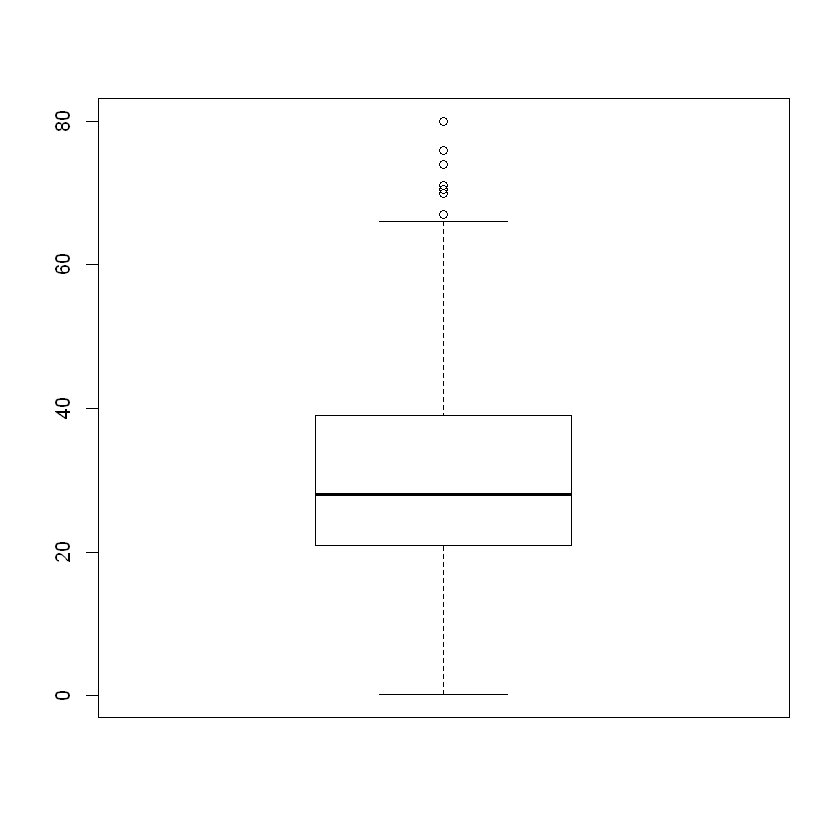

In [11]:
# Building model to predict missing Age values
table(is.na(full_data$Age))

boxplot(full_data$Age) # checking and filtering outliers

In [12]:
upper_whisker <- boxplot.stats(full_data$Age)$stats[5] # filtering non outlier fares 
age_filter <- full_data$Age < upper_whisker

age_formula <- as.formula("Age ~ Pclass + Sex + SibSp + Parch + Fare + Embarked")
LM_age <- lm(
  formula = age_formula,
  data = full_data[age_filter,]
)

In [13]:
# non null age data
age_row <- full_data[is.na(full_data$Age), c("Pclass","Sex","SibSp","Parch","Fare","Embarked")]

#predict missing age
predicted_age <- predict(LM_age, newdata = age_row)

# Assign predicted age in place of missing age value
full_data[is.na(full_data$Age), 'Age'] <-  predicted_age
table(is.na(full_data$Age))


FALSE 
 1309 

#### Building model to predict missing fare values


FALSE  TRUE 
 1308     1 

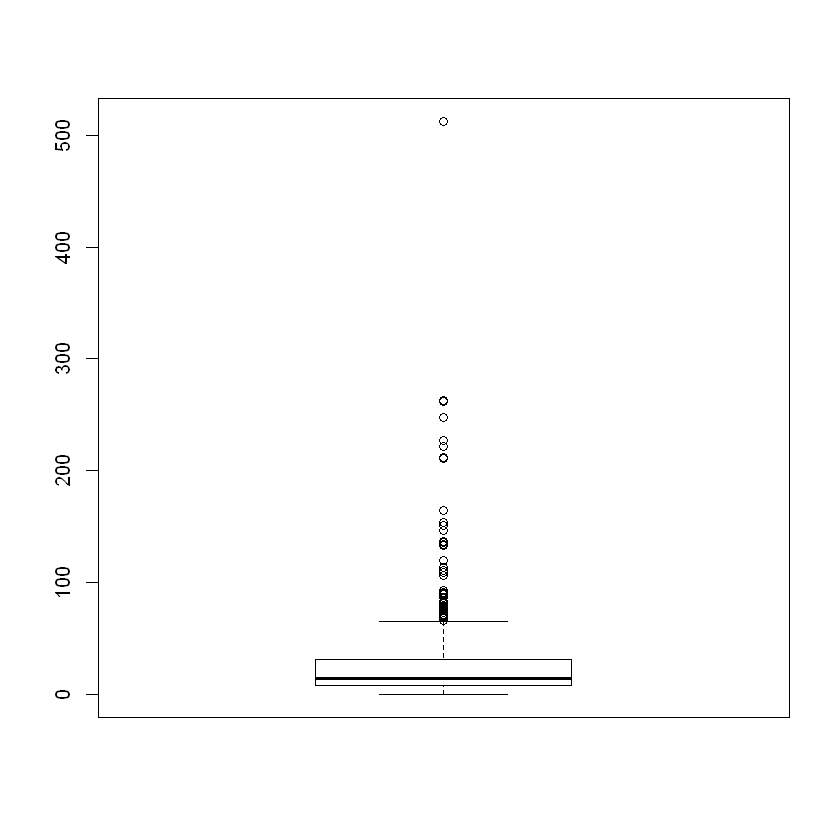

In [14]:
# Building model to predict missing fare values
table(is.na(full_data$Fare))

boxplot(full_data$Fare) # checking and filtering outliers

In [15]:
upper_whisker <- boxplot.stats(full_data$Fare)$stats[5] # filtering non outlier fares 
fare_filter <- full_data$Fare < upper_whisker

fare_formula <- as.formula("Fare ~ Pclass + Sex + Age + SibSp + Parch + Embarked")
LM_fare <- lm(
  formula = fare_formula,
  data = full_data[fare_filter,]
)

In [16]:
# non null fare data
fare_row <- full_data[is.na(full_data$Fare), c("Pclass","Sex","Age","SibSp","Parch","Embarked")]

#predict missing fare
predicted_fare <- predict(LM_fare, newdata = fare_row)

# Assign predicted fare in place of missing fare value
full_data[is.na(full_data$Fare), 'Fare'] <- predicted_fare

table(is.na(full_data$Fare))


FALSE 
 1309 

In [17]:
# Training and Test Datasets after processing of empty/missing values
train_data <- full_data[full_data$IsTrainSet== T,]
test_data <- full_data[!full_data$IsTrainSet== T,]

In [18]:
# Categorical Casting
full_data$Pclass <- as.factor(full_data$Pclass)
full_data$Sex <- as.factor(full_data$Sex)
full_data$Embarked <- as.factor(full_data$Embarked)

In [19]:
# STRUCTURE OF FULL DATASET
str(full_data)

'data.frame':	1309 obs. of  13 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : Factor w/ 3 levels "1","2","3": 3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr  "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr  "" "C85" "" "C123" ...
 $ Embarked   : Factor w/ 3 levels "C","Q","S": 3 1 3 3 3 2 3 3 3 1 ...
 $ IsTrainSet : logi  TRUE TRUE TRUE TRUE TRUE TRUE ...


In [20]:
# Training and Test Datasets after processing of empty/missing values
train_data <- full_data[full_data$IsTrainSet== T,]
test_data <- full_data[!full_data$IsTrainSet== T,]

In [21]:
# creating vectors of 0 and 1 from survived data
train_data$Survived <- as.factor(train_data$Survived)

## Predicting 'Survivors' using Random Forest Algorithm

In [22]:
# Formula to calculated survived/or not using Random Forest Algorithm
survived_formula <- as.formula("Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked")

#### Install Random Forest R package to use it for analysis

+ `install.packages("randomForest")`

In [23]:
# import randomForest library/package
library(randomForest)

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.


In [24]:
# RF Model
rf_model <- randomForest(formula=survived_formula, data = train_data, 
             ntree= 500, mtry = 3, 
              nodesize = 0.01 * nrow(test_data))

In [25]:
features_equation <- "Pclass + Sex + Age + SibSp + Parch + Fare + Embarked"

In [26]:
# Applying the trained model on test data to predict the survivors
Survived <- predict(rf_model, newdata = test_data)

In [27]:
# creating the data frame from predicted results
PassengerId <- test_data$PassengerId
output.df <- as.data.frame(PassengerId)
output.df$Survived <- Survived

In [28]:
# Saving the predicted results as CSV file
write.csv(output.df, file="Kaggle_submission_02.csv", row.names = F)